In [210]:
# First I have import all the important libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

In [133]:
# I have got the dataset from the given data
df = pd.read_csv('Glass_prediction.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Data Cleaning :

In [134]:
# First I am giving the appropriate column names to the respective columns
df = pd.concat([df.iloc[[0]], df.iloc[1:]], ignore_index=True)
new_column_names = ["Id", "RI: refractive index", "Na: Sodium", "Mg: Magnesium",
                    "Al: Aluminum", "Si: Silicon", "K: Potassium", "Ca: Calcium",
                    "Ba: Barium", "Fe: Iron", "Type of glass"]
df.columns = new_column_names
df

,Id,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Data Preprocessing :

In [135]:
# Checking the information  of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    213 non-null    int64  
 1   RI: refractive index  213 non-null    float64
 2   Na: Sodium            213 non-null    float64
 3   Mg: Magnesium         213 non-null    float64
 4   Al: Aluminum          213 non-null    float64
 5   Si: Silicon           213 non-null    float64
 6   K: Potassium          213 non-null    float64
 7   Ca: Calcium           213 non-null    float64
 8   Ba: Barium            213 non-null    float64
 9   Fe: Iron              213 non-null    float64
 10  Type of glass         213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [136]:
# Checking is there any null value is there in any column
df.isnull().sum()

Id                      0
RI: refractive index    0
Na: Sodium              0
Mg: Magnesium           0
Al: Aluminum            0
Si: Silicon             0
K: Potassium            0
Ca: Calcium             0
Ba: Barium              0
Fe: Iron                0
Type of glass           0
dtype: int64

# Working with outliers :

In [137]:
# Checking for outliers :
df.describe()

,Id,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Id                         Axes(0.125,0.712609;0.133621x0.167391)
RI: refractive index    Axes(0.285345,0.712609;0.133621x0.167391)
Na: Sodium               Axes(0.44569,0.712609;0.133621x0.167391)
Mg: Magnesium           Axes(0.606034,0.712609;0.133621x0.167391)
Al: Aluminum            Axes(0.766379,0.712609;0.133621x0.167391)
Si: Silicon                Axes(0.125,0.511739;0.133621x0.167391)
K: Potassium            Axes(0.285345,0.511739;0.133621x0.167391)
Ca: Calcium              Axes(0.44569,0.511739;0.133621x0.167391)
Ba: Barium              Axes(0.606034,0.511739;0.133621x0.167391)
Fe: Iron                Axes(0.766379,0.511739;0.133621x0.167391)
Type of glass               Axes(0.125,0.31087;0.133621x0.167391)
dtype: object

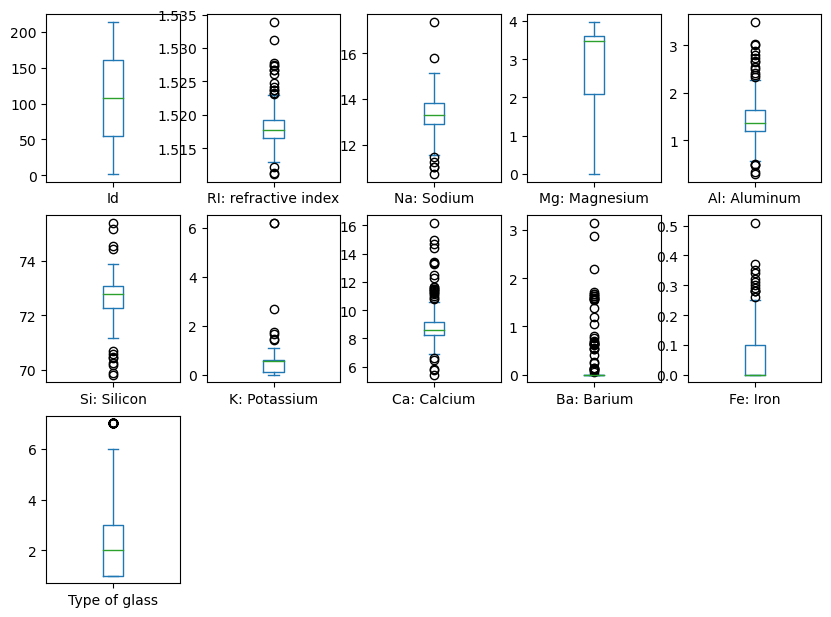

In [138]:
# Checking visually by bosplot
df.plot(kind = 'box', subplots = True ,layout = (4,5), figsize = (10,10))

In [139]:
# I can see some outliers on Na:Sodium , Al:Aluminium , K:Potassium , Ca:Calsium , Ba:Barium and Fe:Iron

In [140]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,Id,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,1.723938,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.851703
1,1.707675,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.851703
2,1.691411,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.851703
3,1.675147,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.851703
4,1.658884,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.851703
...,...,...,...,...,...,...,...,...,...,...,...
208,1.658884,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,2.005192
209,1.675147,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,2.005192
210,1.691411,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,2.005192
211,1.707675,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,2.005192


In [141]:
threshold = 3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [142]:
# I have removed all the outliers by keeping only values which z-score value is less than 3
new_df = df[(z<3).all(axis = 1)]
new_df

,Id,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [143]:
new_df.describe()

,Id,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,102.746114,1.518046,13.415803,2.871658,1.424404,72.725492,0.433472,8.825026,0.123990,0.051865,2.626943
std,61.254530,0.002284,0.674850,1.306938,0.444327,0.582410,0.281741,0.991712,0.357943,0.085924,2.032471
min,2.000000,1.511310,11.030000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,50.000000,1.516510,12.940000,2.850000,1.190000,72.380000,0.140000,8.240000,0.000000,0.000000,1.000000
50%,98.000000,1.517630,13.300000,3.500000,1.360000,72.830000,0.560000,8.580000,0.000000,0.000000,2.000000
75%,154.000000,1.518980,13.790000,3.610000,1.610000,73.090000,0.600000,9.080000,0.000000,0.090000,3.000000
max,213.000000,1.527250,15.150000,3.980000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


# Checking the skewness :

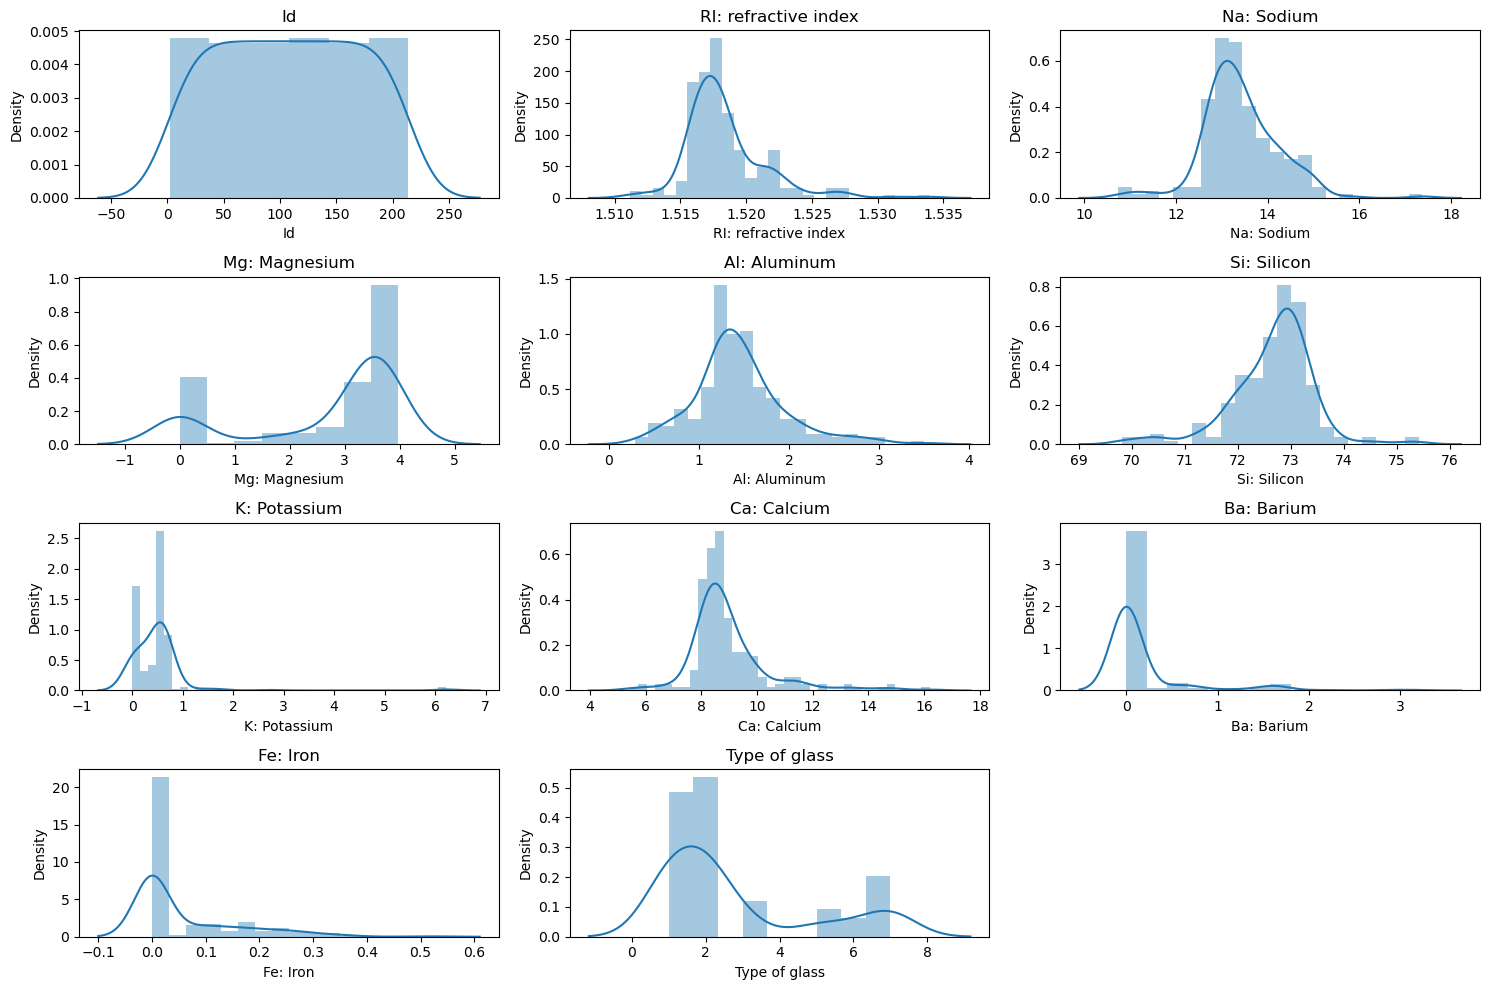

In [144]:
plt.figure(figsize=(15, 10)) 
for i, col in enumerate(new_df.columns):
    ax = plt.subplot(4, 3, i + 1)  
    sns.distplot(df[col], ax=ax)  
    ax.set_title(col)  


plt.tight_layout() 

plt.show()

In [ ]:
# I think skewness is considerable here in this dataset

# EDA :

<Axes: xlabel='Type of glass', ylabel='RI: refractive index'>

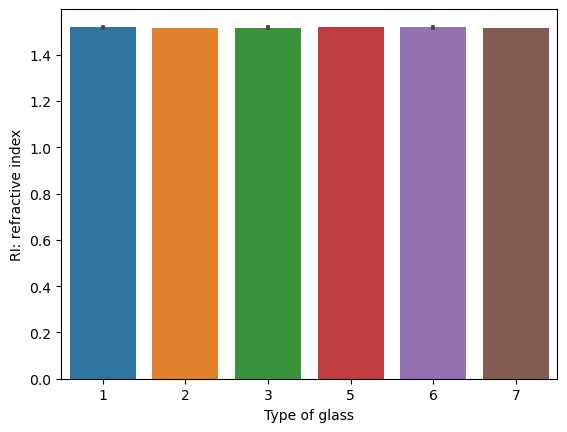

In [36]:
sns.barplot(data=new_df, x='Type of glass', y='RI: refractive index')

In [299]:
# Refrective index is almost same for each type of glass

<Axes: xlabel='Type of glass', ylabel='Na: Sodium'>

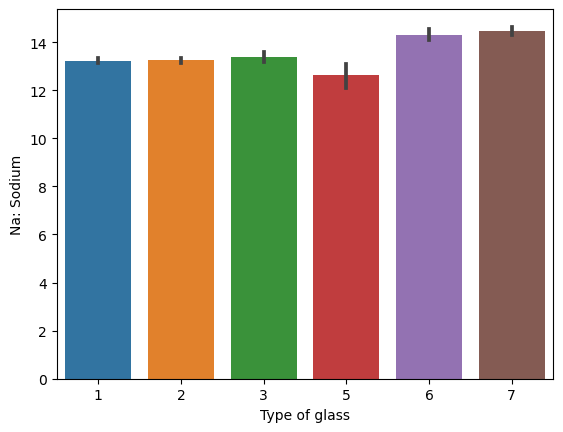

In [39]:
sns.barplot(data=new_df, x='Type of glass', y='Na: Sodium' )

In [ ]:
# Sodium (Na) is quite high in the glass types 'headlamps' and 'tableware' as compared to other types

<Axes: xlabel='Type of glass', ylabel='Mg: Magnesium'>

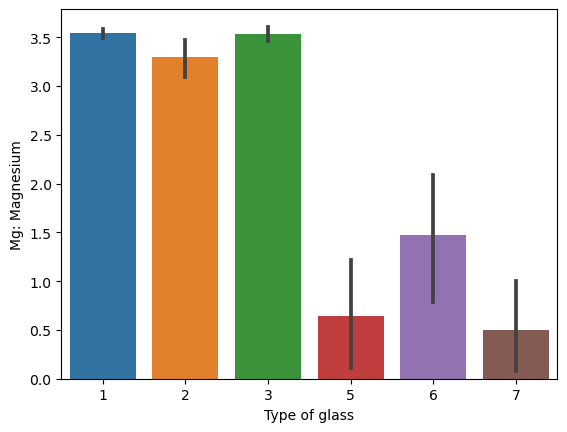

In [40]:
sns.barplot(data=new_df, x='Type of glass', y='Mg: Magnesium')

In [ ]:
# Magnesium is high in glass types 'building_windows_float_processed','building_windows_non_float_processed' and 'vehicle_windows_float_processed'
# Magnesium is low in glass types 'containers','tableware' and  'headlamps'
# Magnesium is lowest in 'headlamps'

<Axes: xlabel='Type of glass', ylabel='Al: Aluminum'>

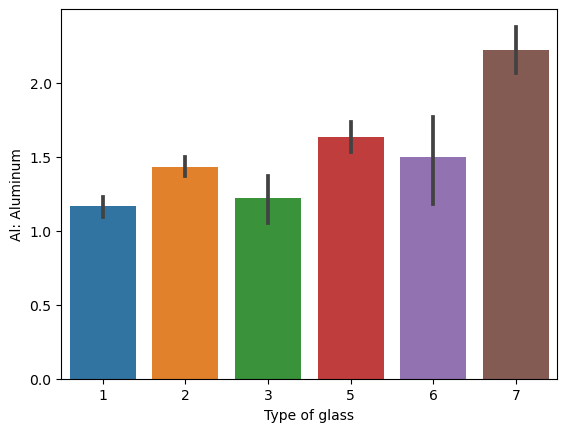

In [42]:
sns.barplot(data=new_df, x='Type of glass', y='Al: Aluminum')

In [ ]:
# Aluminium is highest in the glass type 'headlamp' as compared to other types

<Axes: xlabel='Type of glass', ylabel='Si: Silicon'>

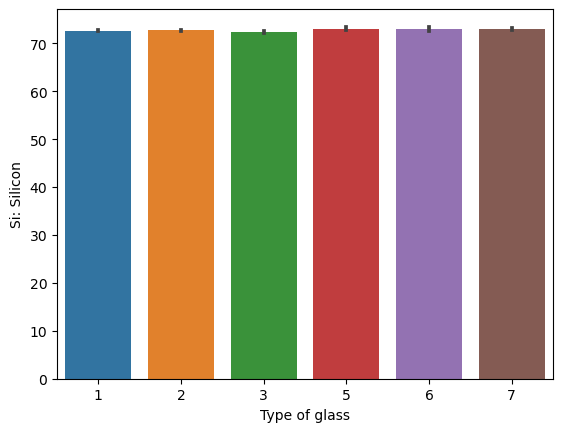

In [44]:
sns.barplot(data=new_df, x='Type of glass', y='Si: Silicon')

In [ ]:
# Ammount of Silicon is almost same in all the types

<Axes: xlabel='Type of glass', ylabel='K: Potassium'>

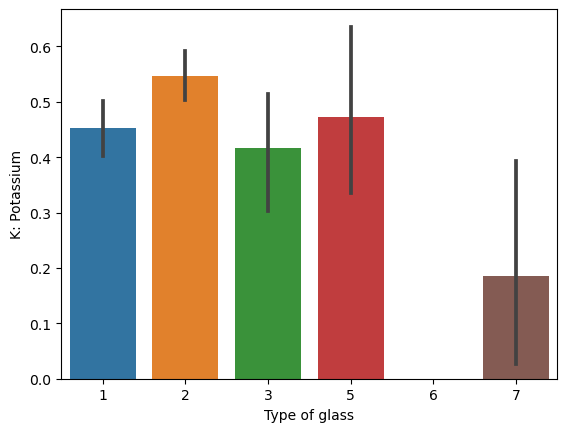

In [45]:
sns.barplot(data=new_df, x='Type of glass', y='K: Potassium')

In [300]:
# Potassium is highest is glass type 'building_windows_non_float_processed'
# Potassium is lowest is glass type 'headlamp'
# There is no Potassium in glass type 'tableware'

<Axes: xlabel='Type of glass', ylabel='Ca: Calcium'>

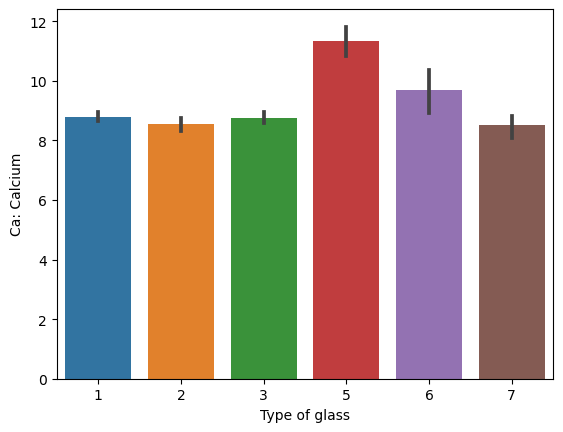

In [46]:
sns.barplot(data=new_df, x='Type of glass', y='Ca: Calcium')

In [301]:
# Calcium is highest in the glass type 'containers'

<Axes: xlabel='Type of glass', ylabel='Ba: Barium'>

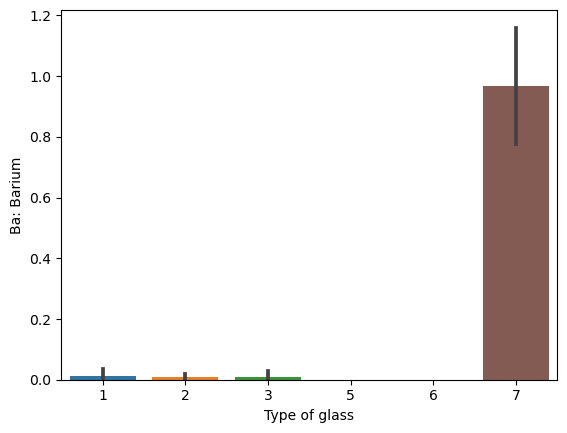

In [47]:
sns.barplot(data=new_df, x='Type of glass', y='Ba: Barium')

In [302]:
# Barrium is highest in the glass type 'headlamp'
# There is little amount of Barrium is present in the glass types 'building_windows_float_processed','building_windows_non_float_processed' and 'vehicle_windows_float_processed'
# There is no Barrium present in the  glass types 'containers' and 'tableware'

<Axes: xlabel='Type of glass', ylabel='Fe: Iron'>

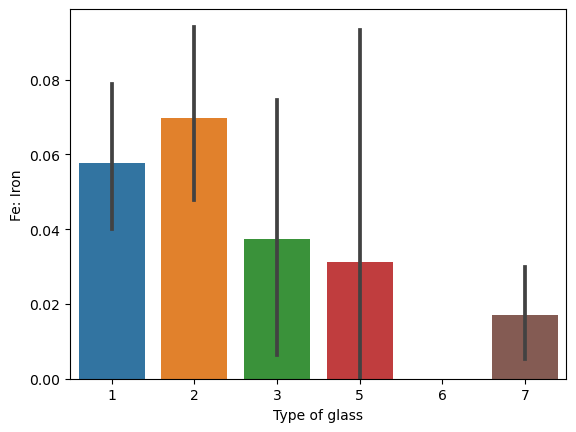

In [48]:
sns.barplot(data=new_df, x='Type of glass', y='Fe: Iron')

In [ ]:
# Iron is highest in 'building_windows_non_float_processed'
# Iron is lowest in 'headlamp'
# There is no iron present in 'tableware'

# Checking Correlation :

In [151]:
df.cor = new_df.corr()

<Axes: >

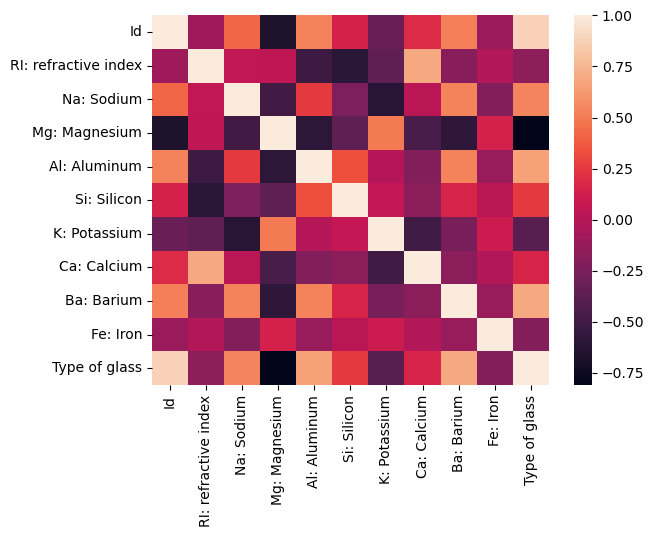

In [152]:
sns.heatmap(df.cor)

# Feature_importance:

In [154]:
# I drop the ID column :
n_df = new_df.drop(columns = 'Id' , axis = 1)

In [155]:
n_df

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


# Using Random Forest :

In [159]:
X = n_df.drop(columns = 'Type of glass' , axis = 1)
y = n_df['Type of glass']

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

 1) Al: Aluminum                   0.179244
 2) Mg: Magnesium                  0.161545
 3) RI: refractive index           0.151032
 4) Ca: Calcium                    0.128475
 5) Ba: Barium                     0.101847
 6) K: Potassium                   0.092833
 7) Na: Sodium                     0.083242
 8) Si: Silicon                    0.076066
 9) Fe: Iron                       0.025716


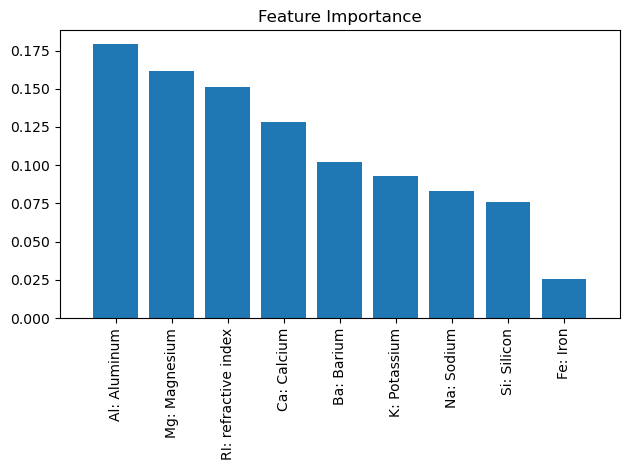

In [166]:
# ( I have taken this code from My book 'Python Machine Learning by Sebastine Raschka & Vahid Mirjalili')
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators = 500 , random_state =1)

forest.fit(X_train , y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1 , 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align = 'center')

plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation = 90)
plt.xlim([-1 , X_train.shape[1]])

plt.tight_layout()
plt.show()

In [ ]:
# So seeing the feature importance , I will drop Na : Sodium , Si: Silicon and Fe: Iron columns because these columns are not very important

In [168]:
Modified_df = n_df.drop(columns = ['Na: Sodium','Si: Silicon','Fe: Iron'] , axis = 1 )

In [169]:
Modified_df

,RI: refractive index,Mg: Magnesium,Al: Aluminum,K: Potassium,Ca: Calcium,Ba: Barium,Type of glass
0,1.51761,3.60,1.36,0.48,7.83,0.00,1
1,1.51618,3.55,1.54,0.39,7.78,0.00,1
2,1.51766,3.69,1.29,0.57,8.22,0.00,1
3,1.51742,3.62,1.24,0.55,8.07,0.00,1
4,1.51596,3.61,1.62,0.64,8.07,0.00,1
...,...,...,...,...,...,...,...
207,1.51640,0.00,2.74,0.00,9.45,0.54,7
208,1.51623,0.00,2.88,0.08,9.18,1.06,7
209,1.51685,0.00,1.99,0.00,8.40,1.59,7
210,1.52065,0.00,2.02,0.00,8.44,1.64,7


In [174]:
# This is the required Dataset

# Creating a model :

In [175]:
X = Modified_df.drop(columns = 'Type of glass' , axis = 1)
y = Modified_df['Type of glass']

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Logistic Regression :

In [194]:
# Checking the best random_state value first :
lr_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train , y_train)
    y_pred = lr.predict(X_test)
    lr_results.append(accuracy_score(y_test , y_pred))

In [196]:
# The best random_state for logistic regression here is : 23 
np.argmax(lr_results)

23

In [189]:
# With random_state = 23 , I am getting the accuracy 0.7413793103448276 .
lr_results[np.argmax(lr_results)]

0.7413793103448276

In [211]:
X_train1 , X_test1 , y_train1  , y_test1 = train_test_split(X,y,test_size = 0.3 , random_state = 23)

In [212]:
# Checking the best parameters for LogisticRegression :
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.001,0.1,1],
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

y_pred_lr = grid_search.best_estimator_.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred_lr)
print("Accuracy score of Logistic Regression :", accuracy)

Accuracy score of Logistic Regression : 0.7241379310344828


In [213]:
print('best parameters :',grid_search.best_params_)

best parameters : {'C': 0.1, 'penalty': 'l2'}


In [216]:
LR = LogisticRegression(C = 0.1 , penalty = 'l2')

In [217]:
# Checking the cross_val_score
print(np.mean(cross_val_score(LR,X,y,cv = 10 , scoring = 'accuracy')))

0.5965789473684211


In [303]:
# We should not relay on LogisticRegression here

# Support Vactor Classifier :

In [218]:
# Checking the best random_state value for Support vactor classifier :
svc_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    svc = SVC()
    svc.fit(X_train , y_train)
    y_pred = svc.predict(X_test)
    svc_results.append(accuracy_score(y_test , y_pred))

In [219]:
# best random_sstate for SVC is 23
np.argmax(svc_results)

23

In [220]:
# Checking the accuracy at random_state 23
svc_results[np.argmax(svc_results)]

0.7068965517241379

In [222]:
# Finding the best parameters for SVC 
param_grid = {
    'kernel': ['poly', 'rbf'],
    'C': [0.01,0.1,1,10],
    'gamma':[0.1,0.2,0.5]
}

grid_search_svc = GridSearchCV(svc, param_grid, cv=5)
grid_search_svc.fit(X_train1, y_train1)

y_pred_svc = grid_search_svc.best_estimator_.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred_svc)
print("Accuracy score of SVC :", accuracy)

Accuracy score of SVC : 0.7931034482758621


In [223]:
print('best parameters :',grid_search_svc.best_params_)

best parameters : {'C': 10, 'gamma': 0.5, 'kernel': 'poly'}


In [224]:
SVC = SVC(C = 10 , gamma = 0.5 , kernel = 'poly')

In [225]:
# Checking the cross validation score :
print(np.mean(cross_val_score(SVC,X,y,cv = 10 , scoring = 'accuracy')))

0.6426315789473683


In [304]:
# Quite better than LogisticRegression but not the best

# KNN :

In [226]:
# Finding the best random_state for KNeighborsClassifier here :
knn_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    knn = KNeighborsClassifier()
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    knn_results.append(accuracy_score(y_test , y_pred))

In [227]:
# Best random_state value is 87
np.argmax(knn_results)

87

In [228]:
# Checking KNN prediction on random_state 87
knn_results[np.argmax(knn_results)]

0.7758620689655172

In [229]:
X_train2, X_test2 , y_train2 , y_test2 = train_test_split(X,y,test_size = 0.3 , random_state = 87)

In [230]:
# Finding the best parameters :
param_grid = {
    'n_neighbors': [3,5,7,10],
    'p': [1,2],
    'weights' :['uniform', 'distance'],
    'metric':['minkowski','str']
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X_train2, y_train2)

y_pred_knn = grid_search_knn.best_estimator_.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_knn)
print("Accuracy score of KNN :", accuracy)

Accuracy score of KNN : 0.7931034482758621


In [231]:
print('best parameters :',grid_search_knn.best_params_)

best parameters : {'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [232]:
KNN = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 7 , p = 2 , weights = 'distance')

In [233]:
# Finding cross validation svore :
print('cross_val_score :',np.mean(cross_val_score(KNN ,X, y , cv = 10 , scoring = 'accuracy')))

cross_val_score : 0.6636842105263157


In [305]:
# Better than the above 2 models

# Decision Tree Classifier :

In [235]:
# Checking the best random_state value for DecisionTree here :
dt_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    dt = DecisionTreeClassifier(max_depth = 7)
    dt.fit(X_train , y_train)
    y_pred = dt.predict(X_test)
    dt_results.append(accuracy_score(y_test , y_pred))

In [236]:
# Best random_state value is 1
np.argmax(dt_results)

1

In [238]:
# Checking the result in random_state = 1
dt_results[np.argmax(dt_results)]

0.8275862068965517

In [239]:
X_train3 , X_test3 , y_train3 , y_test3 = train_test_split(X,y ,test_size = 0.3 , random_state = 1)

In [241]:
# Checking best parameters :
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [4 ,5, 6, 7, 8  ],
    'min_samples_split': [3,5,6,8],
}

grid_search_dt = GridSearchCV(dt, param_grid, cv=5)
grid_search_dt.fit(X_train3, y_train3)

y_pred_dt = grid_search_dt.best_estimator_.predict(X_test3)

accuracy = accuracy_score(y_test3, y_pred_dt)
print("Accuracy score of Decision Tree Classifier :", accuracy)

Accuracy score of KNN : 0.8103448275862069


In [242]:
print('best parameters :',grid_search_dt.best_params_)

best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8, 'splitter': 'best'}


In [259]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5 , min_samples_split = 8 , splitter = 'best')
DT.fit(X_train3 , y_train3)
y_pred_DT = DT.predict(X_test3)
print(accuracy_score(y_test3, y_pred_DT))

0.8275862068965517


In [306]:
# DecisionTreeClassifier is giving good accuracy

# Random Forest Classifier :

In [250]:
# Checking the best random_state value for RandomForestClassifier :
rf_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    rf = RandomForestClassifier(n_estimators = 100 ,max_depth = 10)
    rf.fit(X_train , y_train)
    y_pred = rf.predict(X_test)
    rf_results.append(accuracy_score(y_test , y_pred))

In [251]:
# The best random_state value is 79
np.argmax(rf_results)

79

In [252]:
# Checking the accuracy in random_state 79
rf_results[np.argmax(rf_results)]

0.896551724137931

In [253]:
X_train4 , X_test4 , y_train4 , y_test4 = train_test_split(X,y,test_size = 0.30 , random_state = 79)

In [254]:
# Finding the best Hyperperemeters :
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators':[100 , 300],
    'max_depth': [ 7, 8 , 10 , 15 ],
    'min_samples_split': [3,5,6,8],
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5)
grid_search_rf.fit(X_train4, y_train4)

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test4)

accuracy = accuracy_score(y_test4, y_pred_rf)
print("Accuracy score of Random Forest Classifier :", accuracy)

Accuracy score of Random Forest Classifier : 0.8448275862068966


In [255]:
print('best parameters :',grid_search_rf.best_params_)

best parameters : {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 100}


In [258]:
RF = RandomForestClassifier(criterion = 'gini', max_depth = 15 , min_samples_split = 3 , n_estimators = 100)
RF.fit(X_train4 , y_train4)
y_pred_RF = RF.predict(X_test4)
print(accuracy_score(y_test4, y_pred_RF))

0.8620689655172413


In [307]:
# Random forest is giving the reliable result

# Gradient Boosting Classifier :

In [261]:
# Checking best random_state for GradientBoostingClassifier :
gb_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    gb = GradientBoostingClassifier(n_estimators = 100 ,max_depth = 1)
    gb.fit(X_train , y_train)
    y_pred = gb.predict(X_test)
    gb_results.append(accuracy_score(y_test , y_pred))

In [262]:
# The best random_state is 3
np.argmax(gb_results)

3

In [263]:
# Checking the accuracy in random_state 3
gb_results[np.argmax(gb_results)]

0.8793103448275862

In [265]:
X_train5 , X_test5 , y_train5 , y_test5 = train_test_split(X,y,test_size = 0.3 , random_state = 3)

In [266]:
GB = GradientBoostingClassifier(n_estimators = 100 , max_depth = 1)
GB.fit(X_train5, y_train5)
y_pred_GB = GB.predict(X_test5)
print(accuracy_score(y_test5 , y_pred_GB))

0.8793103448275862


In [ ]:
# So GradientBoosting is also giving a reliable result

# Voting Classifier :

In [270]:
voting_clf = VotingClassifier(
   estimators = [
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 5 , min_samples_split = 8 , splitter = 'best')),
       ('rfc',RandomForestClassifier(criterion = 'gini', max_depth = 15 , min_samples_split = 3 , n_estimators = 100)),
       ('gbc',GradientBoostingClassifier(n_estimators = 100 , max_depth = 1))
   ])
voting_clf.fit(X_train4 , y_train4)
voting_pred = voting_clf.predict(X_test4)
accuracy = accuracy_score(y_test4, voting_pred)
print("Accuracy score of Voting Classifier :", accuracy)


Accuracy score of Voting Classifier : 0.8448275862068966


# Stacking Classifier :

In [290]:
stacking_clf = StackingClassifier(
   estimators = [
       ('lr', LogisticRegression(C = 0.1 , penalty = 'l2')),
       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 5 , min_samples_split = 8 , splitter = 'best')),
       ('rfc',RandomForestClassifier(criterion = 'gini', max_depth = 15 , min_samples_split = 3 , n_estimators = 100)),
       ('gbc',GradientBoostingClassifier(n_estimators = 100 , max_depth = 1))
   ],
   final_estimator = RandomForestClassifier(criterion = 'gini', max_depth = 15 , min_samples_split = 3 , n_estimators = 100),
   cv = 5
)


In [292]:
stacking_clf.fit(X_train5, y_train5)
stacking_pred = stacking_clf.predict(X_test5)
accuracy = accuracy_score(y_test5, stacking_pred)
print("Accuracy score of Stacking Classifier :", accuracy)

Accuracy score of Stacking Classifier : 0.8620689655172413


In [ ]:
# So , Analysisng the above Models , I would go for 'Stacking Classifier' and hence the best random_state would be 3 .

# Building a prediction function :

# 1.

In [294]:
def glass_Prediction(p):
    p = p.reshape(1,-1)
    pred = stacking_clf.predict(p)
    if pred == 1 :
        print("building_windows_float_processed")
    elif pred == 2 :
        print("building_windows_non_float_processed")
    elif pred == 3 :
        print("vehicle_windows_float_processed")
    elif pred == 4 :
        print("vehicle_windows_non_float_processed")
    elif pred == 5 :
        print("containers")
    elif pred == 6 :
        print("tableware")
    else :
        print("headlamps")

In [295]:
p = np.array([1.51761,	3.60,	1.36,	0.48,	7.83,	0.00])
Glass_Prediction(p)

building_windows_float_processed


# 2.

In [298]:
def Glass_Prediction():

  RI = float(input("Enter the refractive index of the glass : "))
  Mg = float(input("Enter the ammount of Magnesium of  the glass : "))
  Al = float(input("Enter the ammount of Aluminium of the glass : "))
  K = float(input("Enter the ammount of Potassium of the glass : "))
  Ca = float(input("Enter the ammount of Calcium of the glass : "))
  Ba = float(input("Enter the ammount of Barrium of the glass : "))


  return np.array([RI,Mg,Al,K,Ca,Ba])

def glass_Prediction(p):
    p = p.reshape(1,-1)
    pred = stacking_clf.predict(p)
    if pred == 1 :
        print(" The Glass type is : building_windows_float_processed")
    elif pred == 2 :
        print(" The Glass type is : building_windows_non_float_processed")
    elif pred == 3 :
        print(" The Glass type is : vehicle_windows_float_processed")
    elif pred == 4 :
        print(" The Glass type is : vehicle_windows_non_float_processed")
    elif pred == 5 :
        print(" The Glass type is : containers")
    elif pred == 6 :
        print(" The Glass type is : tableware")
    else :
        print(" The Glass type is : headlamps")


if __name__ == "__main__":
  try:
    user_data = Glass_Prediction()
    glass_Prediction(user_data)
  except ValueError as e:
    print("Error:", e)

Enter the refractive index of the glass : 1.51860
Enter the ammount of Magnesium of  the glass : 3.43
Enter the ammount of Aluminium of the glass : 1.43
Enter the ammount of Potassium of the glass : 0.51
Enter the ammount of Calcium of the glass : 8.60
Enter the ammount of Barrium of the glass : 0.0
 The Glass type is : building_windows_non_float_processed


In [297]:
Modified_df.sample(5)

,RI: refractive index,Mg: Magnesium,Al: Aluminum,K: Potassium,Ca: Calcium,Ba: Barium,Type of glass
56,1.51824,3.48,1.29,0.60,8.43,0.0,1
28,1.51784,3.49,1.28,0.60,8.49,0.0,1
94,1.51860,3.43,1.43,0.51,8.60,0.0,2
21,1.51736,3.62,1.29,0.59,8.70,0.0,1
49,1.52320,3.72,0.51,0.09,10.06,0.0,1
